In [58]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages



## Load the data

In [30]:
def parser(x):
    # fake the year numbers
    return datetime.strptime('200'+x, '%Y-%m')

In [31]:
series = read_csv('shampoo-sales.csv', 
                  header=0, # wor #0 is the header row
                  quotechar='"',
                 parse_dates=[0],
                 index_col=0, # date column is index
                 squeeze=True, # return series if only 1 column
                 date_parser=parser)

In [32]:
series.head()

Month
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

## Plot the data

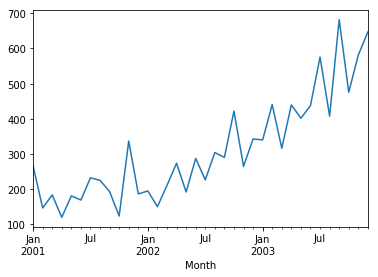

In [33]:
series.plot()
pyplot.show()

## Investigate Autocorrelation

In [46]:
from pandas.plotting import autocorrelation_plot

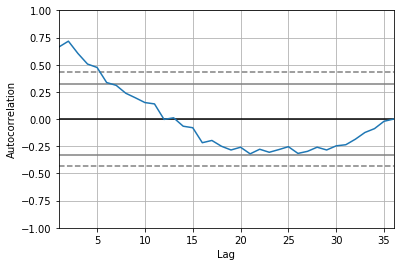

In [47]:
autocorrelation_plot(series)
pyplot.show()

## Fit ARIMA model

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 19 Aug 2018   AIC                            406.340
Time:                                                 15:42:37   BIC                            417.227
Sample:                                             02-01-2001   HQIC                           410.098
                                                  - 12-01-2003                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

### Residual errors

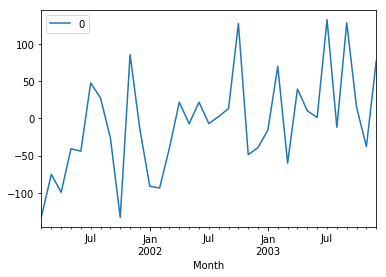

In [65]:
# residuals = pd.DataFrame(model_fit.resid)
residuals = model_fit.resid.to_frame()
residuals.plot()
pyplot.show()

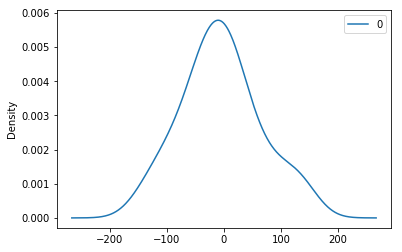

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


In [66]:
residuals.plot(kind='kde')
pyplot.show()

In [67]:
print(residuals.describe())

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


## Predicting next values

In [69]:
from sklearn.metrics import mean_squared_error

In [72]:
X = series.values

# split into train and test set
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

# all observations
history = [x for x in train]

# all predicted values
predictions = list()
for t in range(len(test)):
    
    # create model using observations
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    
    # predict next value
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(yhat)
    
    # TODO why do we use the actual value here?
    obs = test[t]
    
    # add new observation
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
    
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)



predicted=349.117677, expected=342.300000
predicted=306.513008, expected=339.700000
predicted=387.376434, expected=440.400000
predicted=348.154253, expected=315.900000
predicted=386.308781, expected=439.300000
predicted=356.082097, expected=401.300000
predicted=446.379514, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923423, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743772, expected=581.300000
predicted=546.343495, expected=646.900000
Test MSE: 6958.325


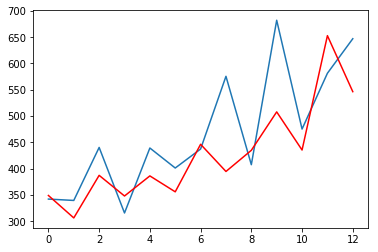

In [73]:
# plot expexted values (test) and predictions
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()